In [ ]:
import psycopg2

conn = psycopg2.connect(
    host="localhost",
    database="postgres",
    user="postgres",
    password=""
)

# 커서 생성
cur = conn.cursor()

In [4]:
# 데이터 조회 쿼리
query = "SELECT * FROM test.user_info;"
cur.execute(query)
row = cur.fetchall()
row

[('jimin', '박지민', '9510131234567', 'SK', '01011111111'),
 ('jungkuk', '전정국', '9709011234567', 'KT', '01022222222'),
 ('jin', '김석진', '9309011234567', 'LG', '01033333333'),
 ('chris', '크리스', '9510132222222', 'SK', '01055555555')]

In [16]:
# 데이터 삽입하기
query = "INSERT INTO test.user_info VALUES ('chris', '크리스', '9510132222222', 'SK', '01055555555');"

# 쿼리 실행
cur.execute(query)

# 쿼리 결과 확정
conn.commit()

In [52]:
# 트랜잭션 초기화
conn.rollback()

# DB 연결 해제하기
#cur.close()
#conn.close()

In [8]:
import pandas as pd

# SQL 쿼리 실행
cur.execute("SELECT * FROM public.chick_info")

# 결과 가져오기
results = cur.fetchall()

# 컬럼명 가져오기
col_names = [desc[0] for desc in cur.description]

# pandas DataFrame으로 변환
df = pd.DataFrame(results, columns=col_names)

In [64]:
#chick_info 테이블에 새 행 삽입
query = """
INSERT INTO public.chick_info (
    chick_no, breeds, gender, hatchday, egg_weight, vaccination1, vaccination2, farm
) VALUES (
    'B2505091', 'C1', 'F', '2025-05-09', 68, 1, 1, 'A'
);
"""

# 쿼리 실행
cur.execute(query)

# 쿼리 결과 확정
conn.commit()

In [58]:
df.head()

,chick_no,breeds,gender,hatchday,egg_weight,vaccination1,vaccination2,farm
0,B2505091,C1,F,2025-05-09,68,1,1,A
1,A2310001,C1,M,2023-01-01,65,1,1,A
2,A2310002,C1,M,2023-01-01,62,1,1,A
3,A2310003,C1,M,2023-01-01,67,1,1,A
4,A2300004,C1,F,2023-01-01,69,1,1,A


In [68]:
# 데이터 업데이트하기
query = """
UPDATE public.chick_info
SET egg_weight = 72
WHERE chick_no = 'B2505091';
"""

# 쿼리 실행
cur.execute(query)

# 쿼리 결과 확정
conn.commit()

In [71]:
df.head()

,chick_no,breeds,gender,hatchday,egg_weight,vaccination1,vaccination2,farm
0,B2505091,C1,F,2025-05-09,72,1,1,A
1,A2310001,C1,M,2023-01-01,65,1,1,A
2,A2310002,C1,M,2023-01-01,62,1,1,A
3,A2310003,C1,M,2023-01-01,67,1,1,A
4,A2300004,C1,F,2023-01-01,69,1,1,A


In [72]:
# 데이터 삭제하기
query = """
DELETE FROM public.chick_info
WHERE chick_no = 'B2505091';
"""

# 쿼리 실행
cur.execute(query)

# 쿼리 결과 확정
conn.commit()

In [75]:
df.head()

,chick_no,breeds,gender,hatchday,egg_weight,vaccination1,vaccination2,farm
0,A2310001,C1,M,2023-01-01,65,1,1,A
1,A2310002,C1,M,2023-01-01,62,1,1,A
2,A2310003,C1,M,2023-01-01,67,1,1,A
3,A2300004,C1,F,2023-01-01,69,1,1,A
4,A2300005,C1,F,2023-01-01,70,1,1,A


In [5]:
from sqlalchemy import create_engine

# DB 접속 정보 딕셔너리 정의
db_params = {
    'user': 'postgres',
    'password': '1234',
    'host': 'localhost',
    'port': '5432',
    'database': 'postgres'
}

# SQLAlchemy 엔진 생성
engine = create_engine(
    f"postgresql://{db_params['user']}:{db_params['password']}@{db_params['host']}:{db_params['port']}/{db_params['database']}"
)

In [6]:
# 기본조회
cur.execute("SELECT * FROM public.chick_info WHERE breeds like 'C%'")

# 특정 조건으로 조회
cur.execute("SELECT * FROM public.health_cond WHERE body_temp > 41.7")

# 조인을 사용한 복합 조회
cur.execute("""
            SELECT a.chick_no, a.breeds, b.body_temp, b.feed_intake
            FROM public.chick_info a
            JOIN public.health_cond b ON a.chick_no = b.chick_no
            WHERE b.check_date = '2023-01-30'
            """)

In [21]:
# PostgreSQL에서 데이터를 불러와 pandas DataFrame으로 변환
# 개별 테이블 불러오기
total_result = pd.read_sql_query("SELECT * FROM public.total_result", engine)
chick_info = pd.read_sql_query("SELECT * FROM public.chick_info", engine)
prod_result = pd.read_sql_query("SELECT * FROM public.prod_result", engine)
health_cond = pd.read_sql_query("SELECT * FROM public.health_cond", engine)
env_cond = pd.read_sql_query("SELECT * FROM public.env_cond", engine)
ship_result = pd.read_sql_query("SELECT * FROM public.ship_result", engine)

In [22]:
total_result.head()

,육계번호,품종,종란무게,체온,호흡수,호수,부적합여부,주문번호,고객사,도착일,도착지
0,A2310001,Cornish,65g,41.2℃,60cnt/min,11,합격,B001,BBQUEEN,2023-02-05,부산
1,A2310002,Cornish,62g,41.7℃,63cnt/min,12,합격,M002,MAXCANA,2023-02-04,당진
2,A2310003,Cornish,67g,40.6℃,63cnt/min,12,합격,M002,MAXCANA,2023-02-04,당진
3,A2300004,Cornish,69g,41.6℃,63cnt/min,12,합격,M001,MAXCANA,2023-02-05,대전
4,A2300005,Cornish,70g,41.5℃,64cnt/min,12,합격,M001,MAXCANA,2023-02-05,대전


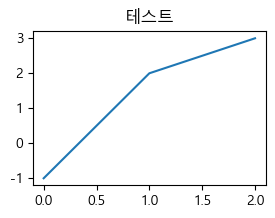

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------
# 한글 폰트 설정
# ---------------------------------------

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

pd.Series([-1,2,3]).plot(title='테스트', figsize=(3,2))
pass

In [23]:
merged = pd.merge(
    total_result,
    prod_result,
    left_on='육계번호',
    right_on='chick_no',
    how='inner'
)

# raw_weight가 문자열일 경우 숫자로 변환
if merged['raw_weight'].dtype == 'object':
    merged['raw_weight'] = merged['raw_weight'].str.replace('g', '', regex=False).astype(float)

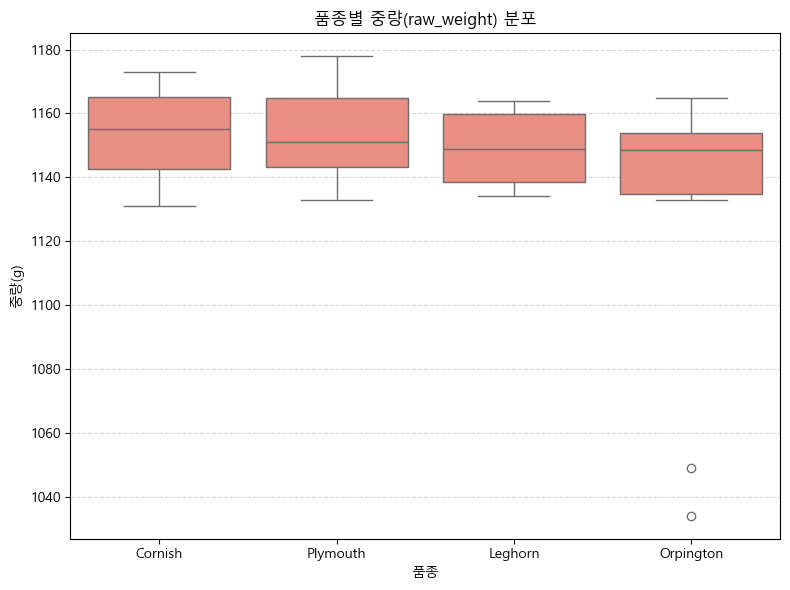

In [24]:
# boxplot 시각화
plt.figure(figsize=(8, 6))
sns.boxplot(x='품종', y='raw_weight', data=merged, color='salmon')
plt.title("품종별 중량(raw_weight) 분포")
plt.xlabel("품종")
plt.ylabel("중량(g)")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

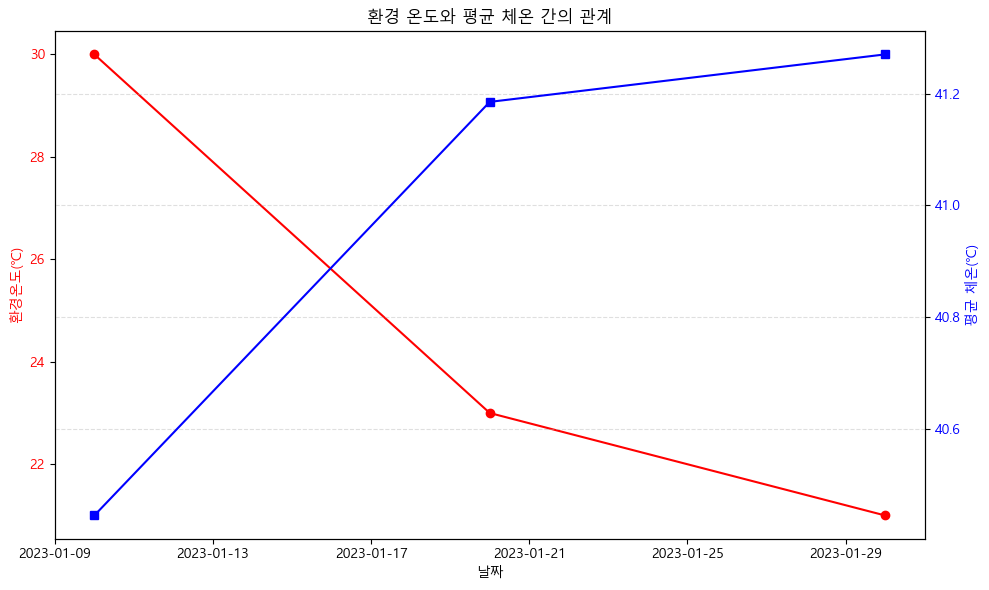

In [30]:
# 날짜별 환경 온도
env_mean = env_cond.groupby('date')['temp'].mean().reset_index()
env_mean.rename(columns={'date': '날짜', 'temp': '환경온도'}, inplace=True)

# 날짜별 평균 체온
temp_mean = health_cond.groupby('check_date')['body_temp'].mean().reset_index()
temp_mean.rename(columns={'check_date': '날짜', 'body_temp': '평균체온'}, inplace=True)

# 날짜 기준 병합
merged = pd.merge(env_mean, temp_mean, on='날짜', how='inner')

# 시각화
fig, ax1 = plt.subplots(figsize=(10, 6))

# 왼쪽 y축: 환경온도
ax1.plot(merged['날짜'], merged['환경온도'], color='red', marker='o', label='환경온도')
ax1.set_ylabel('환경온도(℃)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# 오른쪽 y축: 평균 체온
ax2 = ax1.twinx()
ax2.plot(merged['날짜'], merged['평균체온'], color='blue', marker='s', label='평균체온')
ax2.set_ylabel('평균 체온(℃)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# 공통 설정
plt.title('환경 온도와 평균 체온 간의 관계')
ax1.set_xlabel('날짜')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()